In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
df["median_house_value"] = df["median_house_value"].apply(lambda x: f"${x:,}")


In [7]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,"$452,600.0",NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,"$358,500.0",NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,"$352,100.0",NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,"$341,300.0",NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,"$342,200.0",NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,"$78,100.0",INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,"$77,100.0",INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,"$92,300.0",INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,"$84,700.0",INLAND


In [8]:
df.sort_values(by="median_house_value", ascending=False, inplace=True)


In [9]:
# Cleaning Phase 
df.loc[:, "total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())



In [10]:
print(df.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  
count    20640.000000  20640.000000  20640.000000   20640.000000  
mean       536.838857   1425.476744    499.539680       3.870671  
std        419.391878   1132.462122    382.329753       1.899822  
min          1.000000      3.000000      1.000000       0.499900  
25%        297.000000    

C:\Users\Win10\AppData\Local\Temp\ipykernel_22072\922924266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["ocean_proximity"],  palette="viridis")


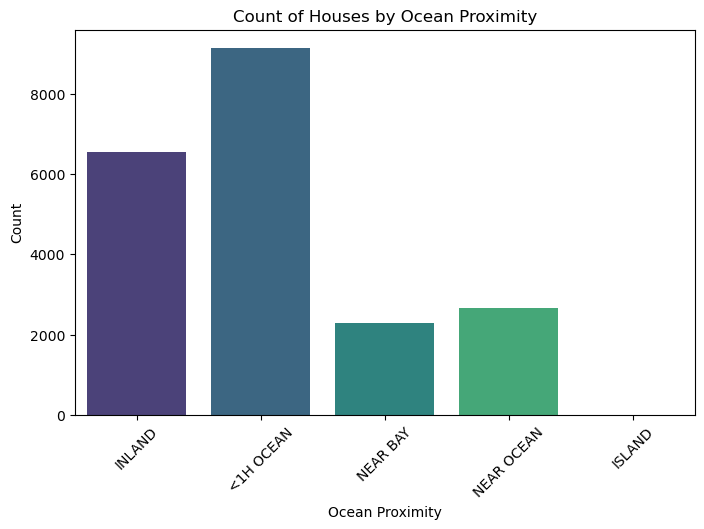

In [46]:
# Data viuslization Phase

plt.figure(figsize=(8, 5))
sns.countplot(x=df["ocean_proximity"],  palette="viridis")
plt.title("Count of Houses by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

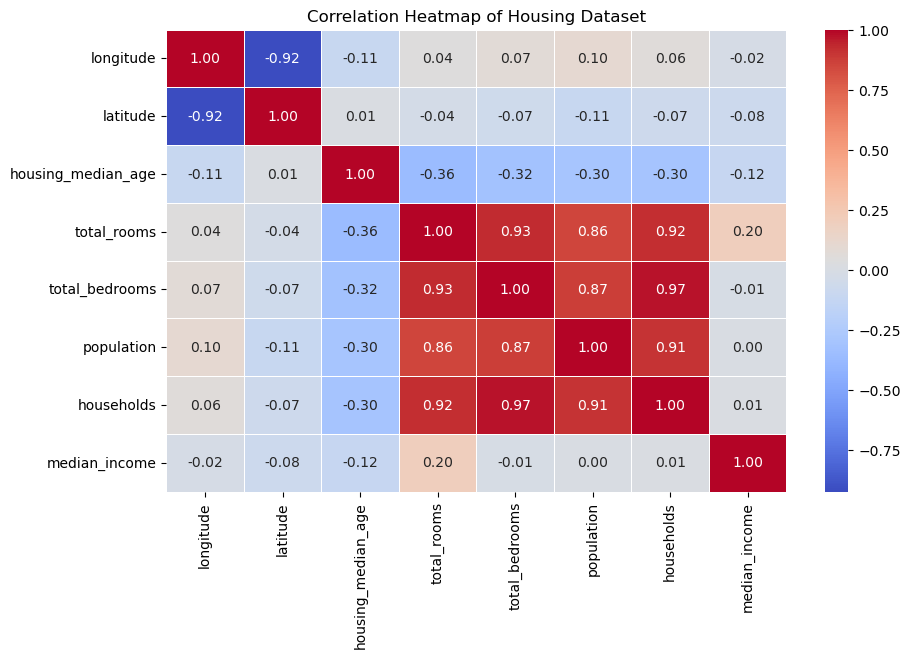

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Housing Dataset")
plt.show()



In [ ]:
# highest value of correlation is between total_bedrooms and households with 0.97

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["median_house_value"], bins=30, kde=True, color="blue")
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()